In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def plot_diagram(ax, 
                 x_y_p, 
                 threshold, 
                 echo, 
                 xlim = np.array([-90,-20]), 
                 ylim = [3, 1], 
                 cs2_alt = 0, 
                 legend = 1):
    
#     print(cs2_alt)
        
    if cs2_alt == 0:
        decon = ''
        ax.plot([threshold, threshold], ylim, 'grey', linestyle = ':', label = str(threshold) + 'dB Threshold')
    else:
        decon = '_decon0'
    
    print(cs2_alt)
 
    pols = ['hh', 'vh', 'hv', 'vv']
    linestyle = ['-', ':', '--']
    
    #find range bin numbers corresponding to yrange
    yrange = np.roll(ylim,1)
    r0 = np.where(abs(x_y_p['range'] - min(yrange)) == min(abs(x_y_p['range'] - min(yrange))))[0][0]
    r1 = np.where(abs(x_y_p['range'] - max(yrange)) == min(abs(x_y_p['range'] - max(yrange))))[0][0]
        
    for p in [0,1]:

        #get data and find highest amplitude peak
        data = np.array(x_y_p[pols[p]+decon][r0:r1,:])
        peak_bin = np.where(data[:,echo] == max(data[:,echo]))[0][0]
        peak = x_y_p['range'][peak_bin + r0]

        #calculate centroids of hh and vh
        centroid = np.sum(x_y_p[pols[p]+decon][r0:r1, echo].T*x_y_p['range'][r0:r1])/np.sum(x_y_p[pols[p]+decon][r0:r1, echo])

        ax.plot(10*np.log10(x_y_p[pols[p]+decon][:,echo]), x_y_p['range'], 
                 'k', linestyle = linestyle[p],
                  linewidth = .8,
                label = pols[p].upper() + ' echo')
        ax.plot(xlim, [peak, peak], 'c', 
                 linestyle = linestyle[p], label = pols[p].upper() + ' Max Peak')
        ax.plot(xlim, [centroid, centroid], 'y', 
                 linestyle = linestyle[p], label = pols[p].upper() + ' Echo Centroid')
    ax.set_xlabel('Relative Power (dB)')
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    
    if cs2_alt == 0:
        u = np.array(x_y_p['hh'+decon][r0:r1,echo])
        as_int = np.where((u-np.roll(u,1) > 0) & (u-np.roll(u,-1) > 0) & (u > 10**(threshold/10)))[0][0]
        ax.plot(xlim, [x_y_p['range'][as_int + r0], x_y_p['range'][as_int + r0]], 
                'm:', linewidth = 4., label = 'Air/Snow Interface')

    if legend != 0:
        ax.legend(loc = 'lower right', facecolor = 'white')
        
    return ax


0
1


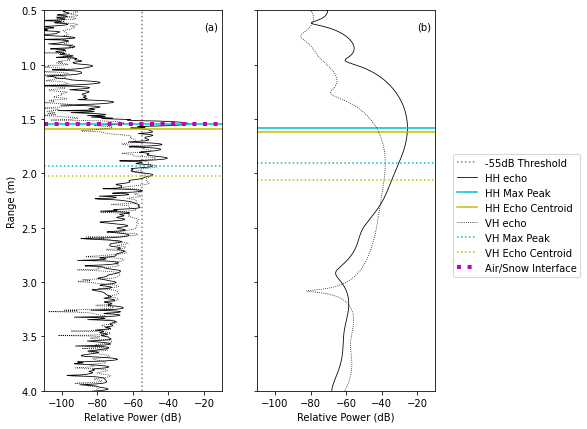

In [3]:
echo = 3500
date = '20191107'
b = 'Ka'
# file_path = '/Volumes/bigLacie/processed_stare_' + add + 'new_nrcs/x_y_p/'

fig, [ax0, ax1] = plt.subplots(1, 2, figsize = (7,7), sharex = True, sharey = True)
ylim = (4, .5)
xlim = np.array([-110, -10])
# fig.subplots_adjust(s)
x_pos = .9
y_pos = .95

threshold = -55
up_down = 0.06

x_y_p = pickle.load( open( '/Volumes/bigLacie/processed_stare_new_nrcs/' + '/x_y_p/x_y_p_'+date+'_'+b+'.p', "rb" ) )

plot_diagram(ax0, x_y_p, threshold, echo, xlim = xlim, ylim = ylim, legend = 0)
ax0.text(x_pos, y_pos, '(a)', transform=ax0.transAxes)
ax0.set_ylabel('Range (m)')
lgd = ax0.legend(loc = [2.3,.3])

threshold = 0
up_down = 0

x_y_p = pickle.load( open( '/Volumes/bigLacie/processed_stare_cs2_alt_new_nrcs/' + '/x_y_p/x_y_p_'+date+'_'+b+'.p', "rb" ) )

plot_diagram(ax1, x_y_p, threshold, echo, 
             xlim = xlim, 
             ylim = ylim, 
             cs2_alt = 1,
            legend = 0)
ax1.text(x_pos, y_pos, '(b)', transform=ax1.transAxes)
plt.savefig('/Users/rosie/Documents/papers/mac_rosie_mosaic/peaks_diagram' + b+ str(echo)+'all.jpg', 
            bbox_extra_artists=(lgd,), 
            bbox_inches='tight',
            dpi = 300)

